<a href="https://colab.research.google.com/github/CatTastic23/CSC177-Data-Analytics-and-Mining/blob/main/nguyen_catherine_csc177_pdwarmups_digmonDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pandas Exercise

Name: Catherine Nguyen

Course: CSC 177

Date: 09/25/2020

**Link to OG Source: [Digimon](https://www.kaggle.com/ivansebastian/beginner-digimon-eda)**

**09/10/2021 Edit: In this assignment, we took another person notebook and added our own changes/analysis to the notebook.** 





---


#THIS IS MY CHANGE



---


##What I Learned from this

Name: Catherine Nguyen

Course: CSC 177

```df.info()``` This is new to me and it return the info of the dataframe. All the columns, the data, the data type, and the number of non null values in the series.

```import seaborn as sns``` Seaborn is a python statistical data visualization libary based on matplotlib. 

```sns.pairplot()``` takes a broader view: joint and marginal distribution for all pairwise relationships and for each variable.

```df['..'].skew()``` tells us where its skews

```df['...'].kurt()``` tells us about the sharpness of the peak

##What I added

First I changed the data so that the series names dont have ' ' in them. 

###This is to get a good look at the data before I add the new Series called 'TOTAL'.

In [ ]:
digimon.head()

,Number,Digimon,Stage,Type,Attribute,Memory,EquipSlots,Lv50HP,Lv50SP,Lv50Atk,Lv50Def,Lv50Int,Lv50Spd,TOTAL
0,1,Kuramon,Baby,Free,Neutral,2,0,590,77,79,69,68,95,978
1,2,Pabumon,Baby,Free,Neutral,2,0,950,62,76,76,69,68,1301
2,3,Punimon,Baby,Free,Neutral,2,0,870,50,97,87,50,75,1229
3,4,Botamon,Baby,Free,Neutral,2,0,690,68,77,95,76,61,1067
4,5,Poyomon,Baby,Free,Neutral,2,0,540,98,54,59,95,86,932


getting the data types of each series

In [ ]:
digimon.dtypes

Number         int64
Digimon       object
Stage         object
Type          object
Attribute     object
Memory         int64
EquipSlots     int64
Lv50HP         int64
Lv50SP         int64
Lv50Atk        int64
Lv50Def        int64
Lv50Int        int64
Lv50Spd        int64
dtype: object

###Below I created a new Series 'TOTAL' which will emcompass the total stats of a digimon. 

In [ ]:
# This creates a new Series called 'TOTAL' which is the total of all digimon stats
digimon["TOTAL"] = digimon['Lv50HP']+digimon['Lv50SP']+digimon['Lv50Atk']+digimon['Lv50Def']+digimon['Lv50Int']+digimon['Lv50Spd']
digimon.head()

,Number,Digimon,Stage,Type,Attribute,Memory,EquipSlots,Lv50HP,Lv50SP,Lv50Atk,Lv50Def,Lv50Int,Lv50Spd,TOTAL
0,1,Kuramon,Baby,Free,Neutral,2,0,590,77,79,69,68,95,978
1,2,Pabumon,Baby,Free,Neutral,2,0,950,62,76,76,69,68,1301
2,3,Punimon,Baby,Free,Neutral,2,0,870,50,97,87,50,75,1229
3,4,Botamon,Baby,Free,Neutral,2,0,690,68,77,95,76,61,1067
4,5,Poyomon,Baby,Free,Neutral,2,0,540,98,54,59,95,86,932


I dont like having 'TOTAL' as the last col so I will move it up a bit. 
First i get the shape so i can justify that when i make a new dataframe it maintains the same shape. 

In [ ]:
digimon.shape

(249, 14)

In [ ]:
#I kept all Series from previous DF but pushed TOTAL forward
digi = digimon[['Number','Digimon','Stage','Type','Attribute','Memory','EquipSlots','TOTAL','Lv50HP'
,'Lv50SP','Lv50Atk','Lv50Def','Lv50Int','Lv50Spd']]
digi.head()

,Number,Digimon,Stage,Type,Attribute,Memory,EquipSlots,TOTAL,Lv50HP,Lv50SP,Lv50Atk,Lv50Def,Lv50Int,Lv50Spd
0,1,Kuramon,Baby,Free,Neutral,2,0,978,590,77,79,69,68,95
1,2,Pabumon,Baby,Free,Neutral,2,0,1301,950,62,76,76,69,68
2,3,Punimon,Baby,Free,Neutral,2,0,1229,870,50,97,87,50,75
3,4,Botamon,Baby,Free,Neutral,2,0,1067,690,68,77,95,76,61
4,5,Poyomon,Baby,Free,Neutral,2,0,932,540,98,54,59,95,86


In [ ]:
#Not necessary but I added something to check it for fun. 
if (digi.shape == digimon.shape):
  print('True shape is: ' + str(digi.shape))
else:
  print('False')

True shape is: (249, 14)


Saving the new dataframe for future purposes

In [ ]:
#saves digi as a csv
digi.to_csv('data/digi.csv')

###Now I want to examine all the digimons by stage and determine which have the highest stats overall.

Below created a table for us to examine. I took the total count, mean, max, min, per stage type and sorted the able by mean in descending order. 

In [ ]:
#I grouped all the data by stage and aggregated the count, mean, max, and min
digi.groupby('Stage').TOTAL.agg(['count', 'mean', 'max', 'min']).sort_values('mean')

,count,mean,max,min
Stage,,,,
Baby,5,1101.400000,1301,932
In-Training,11,1236.181818,1412,962
Rookie,38,1358.815789,1868,1002
Champion,54,1596.555556,1943,1142
Armor,3,1850.666667,2012,1668
Ultimate,58,1892.206897,2498,1442
Mega,74,2174.324324,2768,1592
Ultra,6,2283.500000,2528,1898


Below I create a variable with the same info above which is then plotted for us to examine graphically.

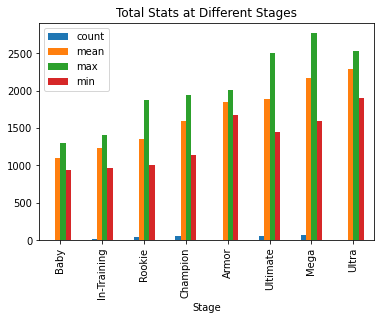

In [ ]:
# Same info as above but but saved into a variable to plot. 
stageinfo=digi.groupby('Stage').TOTAL.agg(['count', 'mean', 'max', 'min']).sort_values('mean')
stageinfo.plot(kind='bar',title='Total Stats at Different Stages' )

---


*   From the graph above, the Ultra stage have the highest stat average, but it 
does not include the digimon with the max stats. 
*   The mega stage holds the digimon with the highest overage stats.
*   The Mega's also have the largest min to max range compared to the other stages.


---



### Now that I know which have the highest from each stage. Lets create a Team of 3 digimon with the highest overall stats in the game 

In [ ]:
digi.head()

,Number,Digimon,Stage,Type,Attribute,Memory,EquipSlots,TOTAL,Lv50HP,Lv50SP,Lv50Atk,Lv50Def,Lv50Int,Lv50Spd
0,1,Kuramon,Baby,Free,Neutral,2,0,978,590,77,79,69,68,95
1,2,Pabumon,Baby,Free,Neutral,2,0,1301,950,62,76,76,69,68
2,3,Punimon,Baby,Free,Neutral,2,0,1229,870,50,97,87,50,75
3,4,Botamon,Baby,Free,Neutral,2,0,1067,690,68,77,95,76,61
4,5,Poyomon,Baby,Free,Neutral,2,0,932,540,98,54,59,95,86


In [ ]:
digi.sort_values('TOTAL', ascending=False).head(3)

,Number,Digimon,Stage,Type,Attribute,Memory,EquipSlots,TOTAL,Lv50HP,Lv50SP,Lv50Atk,Lv50Def,Lv50Int,Lv50Spd
178,179,Gankoomon,Mega,Data,Fire,22,1,2768,2080,90,188,163,109,138
245,246,ShineGreymon BM,Mega,Vaccine,Fire,22,2,2678,1980,114,228,104,84,168
193,194,Titamon,Mega,Virus,Earth,18,3,2583,1930,99,183,128,114,129


---



*   It shows here that the 3 Digimon that hold the higher overall stats are in the Mega stage
*   But is this really the best team? 
*   What if we took it further a bit to find the best digimon.
*   Can we find the digimon with best stat ratio?
---


3##Just messing around with the babies

In [ ]:
# this does not affect te originl data just examines a portion where
# the type is babu and its in descending order
digi[digi.Stage=='Baby'].sort_values('TOTAL', ascending=False)

,Number,Digimon,Stage,Type,Attribute,Memory,EquipSlots,TOTAL,Lv50HP,Lv50SP,Lv50Atk,Lv50Def,Lv50Int,Lv50Spd
1,2,Pabumon,Baby,Free,Neutral,2,0,1301,950,62,76,76,69,68
2,3,Punimon,Baby,Free,Neutral,2,0,1229,870,50,97,87,50,75
3,4,Botamon,Baby,Free,Neutral,2,0,1067,690,68,77,95,76,61
0,1,Kuramon,Baby,Free,Neutral,2,0,978,590,77,79,69,68,95
4,5,Poyomon,Baby,Free,Neutral,2,0,932,540,98,54,59,95,86


In [ ]:
# this does not affect te originl data just examines a portion where
# the type is babu and its in descending order
digi[digi.Stage=='Baby'].TOTAL.max()#sort_values('TOTAL', ascending=False)

1301

###Now I want to combine all three file into one for practice

In [ ]:
import os
import pandas as pd

all_digi_data = pd.DataFrame()
digis= [d for d in os.listdir('data/')]

for d in digis:
  df = pd.read_csv('data/' + d)
  all_digi_data = pd.concat([all_digi_data, df])

all_digi_data.shape

(722, 19)

In [ ]:
all_digi_data.tail()

,Name,Description,Move,SP Cost,Type,Power,Attribute,Inheritable,Number,Digimon,Stage,Memory,EquipSlots,Lv50HP,Lv50SP,Lv50Atk,Lv50Def,Lv50Int,Lv50Spd
244,NaN,NaN,NaN,NaN,Free,NaN,Wind,NaN,245.0,Valkyrimon,Mega,18.0,3.0,1330.0,139.0,148.0,129.0,129.0,168.0
245,NaN,NaN,NaN,NaN,Vaccine,NaN,Fire,NaN,246.0,ShineGreymon BM,Mega,22.0,2.0,1980.0,114.0,228.0,104.0,84.0,168.0
246,NaN,NaN,NaN,NaN,Data,NaN,Light,NaN,247.0,MirageGaogamon BM,Mega,20.0,2.0,1440.0,124.0,178.0,104.0,158.0,174.0
247,NaN,NaN,NaN,NaN,Vaccine,NaN,Wind,NaN,248.0,Ravemon BM,Mega,20.0,2.0,1040.0,133.0,149.0,139.0,144.0,213.0
248,NaN,NaN,NaN,NaN,Data,NaN,Plant,NaN,249.0,Rosemon BM,Mega,20.0,2.0,1480.0,143.0,149.0,139.0,159.0,143.0


### trying out new things

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


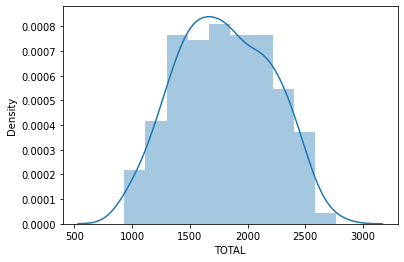

In [ ]:
#histogram
sns.distplot(digi['TOTAL'])

The graph above ins interesting. I dont know what it means by density but i think i get it. Slightly deviates from normal distribution. 

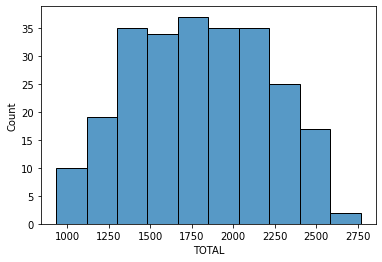

In [ ]:
sns.histplot(digi['TOTAL'])

this graph looks a whole lot less drastic than the graph below because everything here seems level.

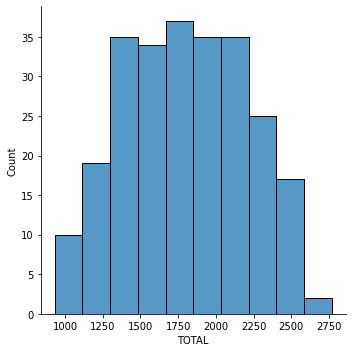

In [ ]:
sns.displot(digi['TOTAL'])

the graph above hold the same info as this one but emphasis of the vertical. peaks at total 1750.

In [ ]:
digi['TOTAL'].skew()

0.0376224696204434

A skewness value of 0 in the output denotes a symmetrical distribution of values in row 1.
A negative skewness value in the output indicates an asymmetry in the distribution corresponding to row 2 and the tail is larger towards the left hand side of the distribution.
A positive skewness value in the output indicates an asymmetry in the distribution corresponding to row 3 and the tail is larger towards the right hand side of the distribution.

In [ ]:
digi['TOTAL'].kurt()

-0.7642074458934971

Negative values of kurtosis indicate that a distribution is flat and has thin tails. Which is in this case it tru it is really flat. Closer to 0 the more normal it is


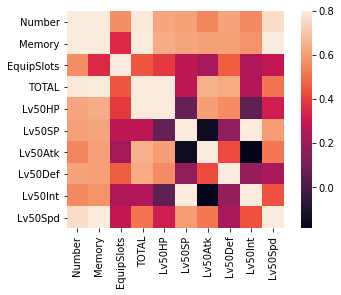

In [ ]:
sns.heatmap(digi.corr(), vmax=.8, square=True);



---


# Digimon Exploratory Data Analysis
### Intro
Digimon stands for Digital Monster, an anime TV show that tells a story about an entirely different world inside the computer created with data. This notebook is for knowing the information of Digimon, their moves, and support to achieve their maximum potential

##Imports

In [ ]:
#imports needed
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Inputting the Data

In [ ]:
# all digimon
digimon = pd.read_csv('data/DigiDB_digimonlist.csv')
#all digimon moves
move = pd.read_csv('data/DigiDB_movelist.csv')
#all the support abilities
support = pd.read_csv('data/DigiDB_supportlist.csv')

## Peeking at the Datasets
As we can see here the datasets is clean and ready to use, no missing values and such.

In [ ]:
digimon.head()

,Number,Digimon,Stage,Type,Attribute,Memory,EquipSlots,Lv50HP,Lv50SP,Lv50Atk,Lv50Def,Lv50Int,Lv50Spd
0,1,Kuramon,Baby,Free,Neutral,2,0,590,77,79,69,68,95
1,2,Pabumon,Baby,Free,Neutral,2,0,950,62,76,76,69,68
2,3,Punimon,Baby,Free,Neutral,2,0,870,50,97,87,50,75
3,4,Botamon,Baby,Free,Neutral,2,0,690,68,77,95,76,61
4,5,Poyomon,Baby,Free,Neutral,2,0,540,98,54,59,95,86


In [ ]:
move.head()

,Move,SP Cost,Type,Power,Attribute,Inheritable,Description
0,Wolkenapalm I,3,Physical,65,Fire,Yes,"Physical attack, 65 Fire damage to one foe. 95..."
1,Wolkenapalm II,6,Physical,85,Fire,Yes,"Physical attack, 85 Fire damage to one foe. 95..."
2,Wolkenapalm III,9,Physical,105,Fire,Yes,"Physical attack, 105 Fire damage to one foe. 9..."
3,Burst Flame I,3,Magic,55,Fire,Yes,"Magic attack, 55 Fire damage to one foe. 95% a..."
4,Burst Flame II,6,Magic,75,Fire,Yes,"Magic attack, 75 Fire damage to one foe. 95% a..."


In [ ]:
support.head()

,Name,Description
0,Adroit Wisdom,Increases INT by 15%.
1,All-Rounder,"Increases ATK, DEF, INT and SPD by 5%."
2,Analyze,Increases scan values by 10%.
3,Animal Colosseum,Increases damage from Earth skills by 15%.
4,Aus Generics,Increases SPD and EVA by 25% when HP drops bel...


In [ ]:
digimon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Number      249 non-null    int64 
 1   Digimon     249 non-null    object
 2   Stage       249 non-null    object
 3   Type        249 non-null    object
 4   Attribute   249 non-null    object
 5   Memory      249 non-null    int64 
 6   EquipSlots  249 non-null    int64 
 7   Lv50HP      249 non-null    int64 
 8   Lv50SP      249 non-null    int64 
 9   Lv50Atk     249 non-null    int64 
 10  Lv50Def     249 non-null    int64 
 11  Lv50Int     249 non-null    int64 
 12  Lv50Spd     249 non-null    int64 
dtypes: int64(9), object(4)
memory usage: 25.4+ KB


In [ ]:
move.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Move         387 non-null    object
 1   SP Cost      387 non-null    int64 
 2   Type         387 non-null    object
 3   Power        387 non-null    int64 
 4   Attribute    387 non-null    object
 5   Inheritable  387 non-null    object
 6   Description  387 non-null    object
dtypes: int64(2), object(5)
memory usage: 21.3+ KB


In [ ]:
support.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         86 non-null     object
 1   Description  86 non-null     object
dtypes: object(2)
memory usage: 1.5+ KB


## Stats
Stats, because Power is Everything!! Unles you're that friend that like a Digimon just because it looks cute.

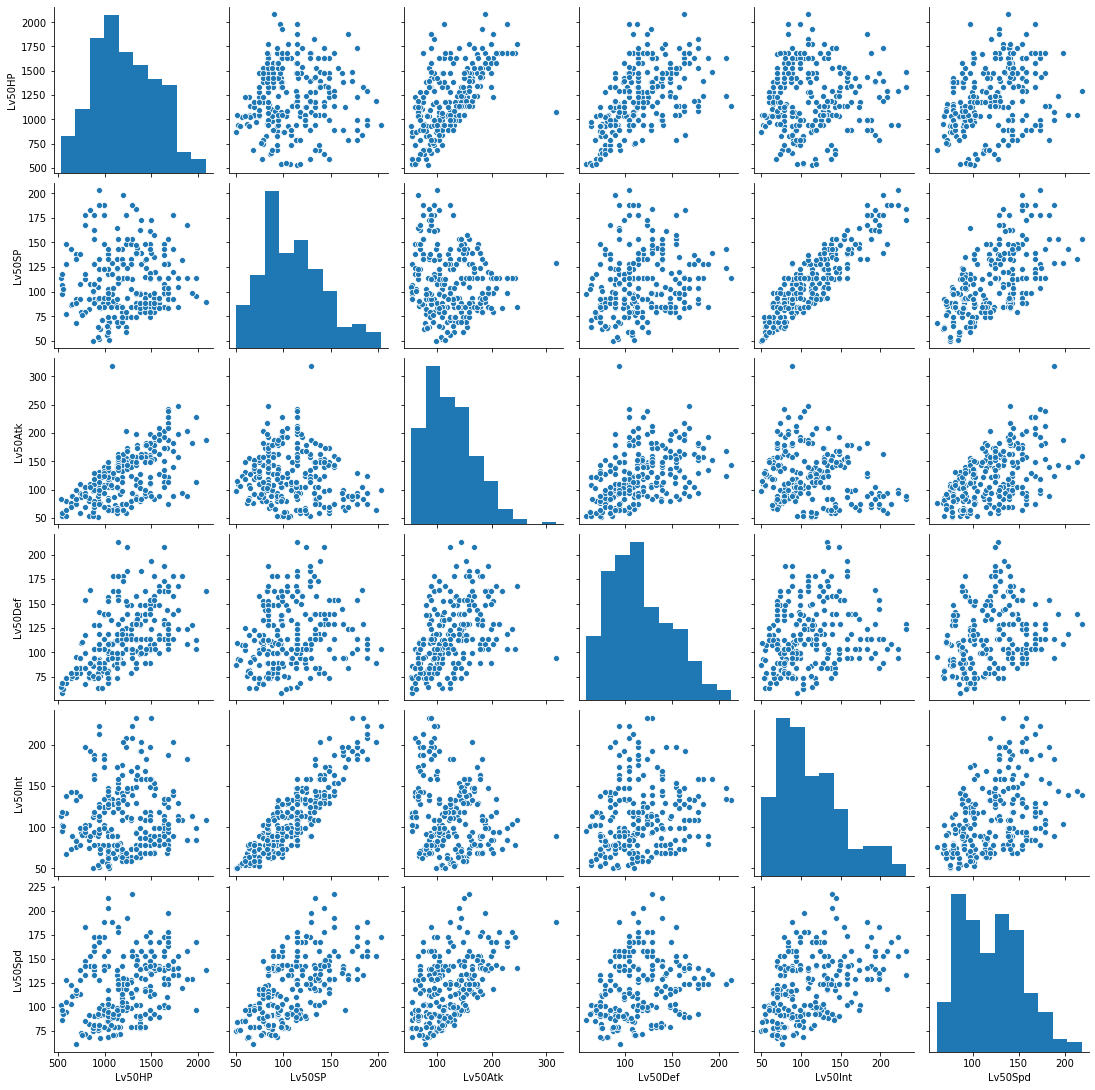

In [ ]:
sns.pairplot(data=digimon[['Lv50HP', 'Lv50SP', 'Lv50Atk', 'Lv50Def', 'Lv50Int', 'Lv50Spd']])
plt.show()

From the pairplot above we can see that, the stats of the Digimons are pretty diverse and reasonable, where it's because this plot contains all Digimon Stages (In-Training to Mega), that's why there are low overall stats and high overall stats. Most notable is on SP vs Int and makes sense because more INT = more SP.

## Digimon Data

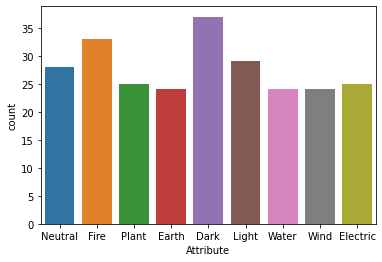

In [ ]:
sns.countplot(x=digimon['Attribute'])
plt.show()

From the above countplot, it seems that Digimon's Attribute are dominantly Dark, followed by Fire and Light, and the rest is pretty much the same.

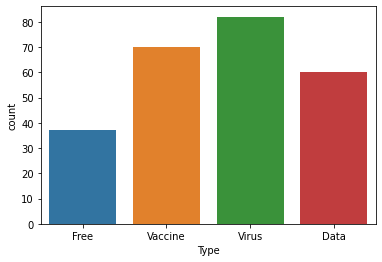

In [ ]:
sns.countplot(x=digimon['Type'])
plt.show()

The plot above shows that Digimon's Type is dominantly by Virus.

##Answering Questions

### Which set of moves will get the best ratio of attack power to SP spent?

In [ ]:
maxratio = move.copy()
maxratio['Max Ratio'] = move.Power / move['SP Cost']

In [ ]:
maxratio['Max Ratio'].idxmax(axis=0)
print(move.iloc[80])

Move                                              Heavy Strike I
SP Cost                                                        3
Type                                                    Physical
Power                                                         70
Attribute                                                Neutral
Inheritable                                                  Yes
Description    Physical attack, 70 Neutral damage to one foe....
Name: 80, dtype: object


It seems the Digimon that have the move 'Heavy Strike I' is good because it has a really efficient damage with low SP cost and somewhat good Power.

### Which team of 3 digimon have the highest attack? Defense?

In [ ]:
digimon.sort_values(by=['Lv50Atk'], ascending=False).head(3)

,Number,Digimon,Stage,Type,Attribute,Memory,EquipSlots,Lv50HP,Lv50SP,Lv50Atk,Lv50Def,Lv50Int,Lv50Spd
243,244,Chaosmon,Ultra,Vaccine,Neutral,25,2,1080,129,318,94,89,188
235,236,Belphemon RM,Ultra,Virus,Dark,25,0,1780,84,247,168,109,140
195,196,Diaboromon,Mega,Free,Dark,20,2,1680,114,243,104,79,173


In [ ]:
digimon.sort_values(by=['Lv50Def'], ascending=False).head(3)

,Number,Digimon,Stage,Type,Attribute,Memory,EquipSlots,Lv50HP,Lv50SP,Lv50Atk,Lv50Def,Lv50Int,Lv50Spd
181,182,GroundLocomon,Mega,Data,Electric,18,3,1140,114,144,213,133,128
182,183,Craniamon,Mega,Vaccine,Earth,22,1,1630,143,124,208,134,124
238,239,Magnamon,Armor,Free,Earth,22,2,1240,124,168,208,148,124


### Are some types over- or under-represented?

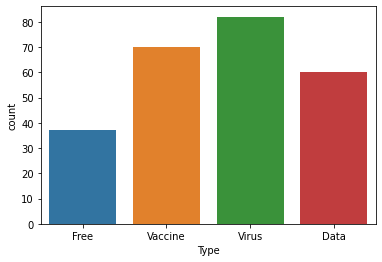

In [ ]:
sns.countplot(x=digimon['Type'])
plt.show()

This question got answered above when plotting the Digimon's Types, as seen in the plot the Virus-type Digimon is over-represented and the Free-type Digimon is under-represented. Also please give more love to Data-type Digimon :(

### Are different types and attributes evenly represented across stages?

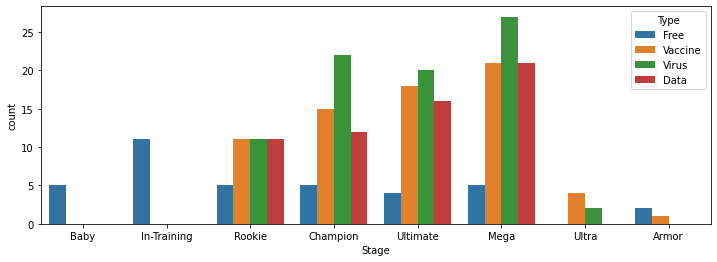

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(hue=digimon['Type'], x=digimon['Stage'])
plt.show()

From the chart above, Digimon Types are not really evenly represented across stages. Digimon's type started as Free-type in Baby and In-Training stages, then as they reached their Rookie stage, they branches evenly towards the other types, with only some Digimon retaining their Free-type. As they keep growing to other higher stages (besides Ultra and Armor stage, as they are special stage), the Digimon's type tends to be more of a Virus-type.

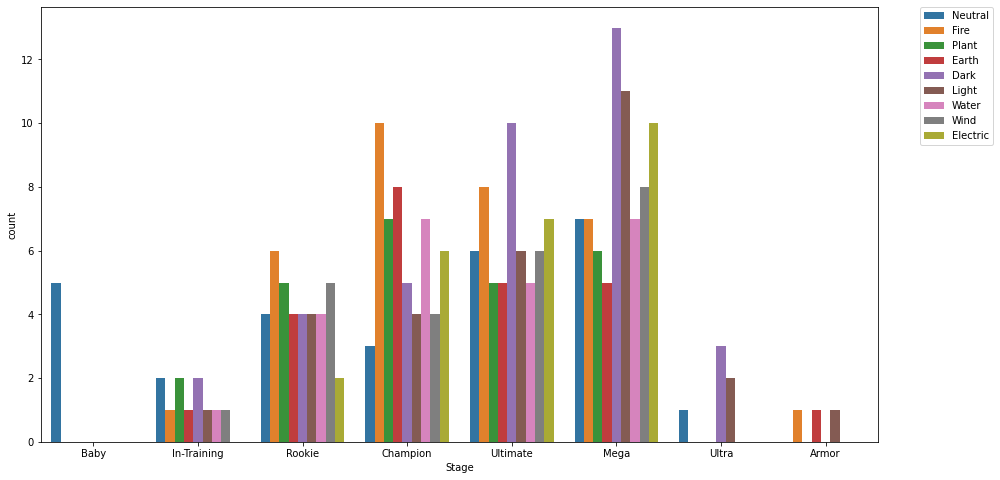

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(hue=digimon['Attribute'], x=digimon['Stage'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Yikes, that's a heavy chart. The Rookie and Champion stage are Fire-type dominated, and Ultimate and Mega stage are Dark-type dominated. It's not evenly represented